1. Literature Review
* Research Existing Models: Identify existing churn prediction models in literature, focusing on both static (demographic, behavioral) and temporal (time-based) features.
    * Random Forest, Gradient Boosting, ARIMA, LSTM

* Identify Gaps: Highlight gaps in the literature regarding the integration of time series analysis with classification techniques for churn prediction.
* Hyrid model of classification techniques + time series analysis to produce a high-accuracy churn prediction model


2. Project Planning
* Define Objectives: Clearly outline the project's goals, including the expected accuracy of the churn prediction model and insights to be derived.
    * **TO DO**: Not decided on expected accuracy yet, more literature review needed
* Identify "Stakeholders": "Small and Diverse Business" list from UCSD’s Small Business Development Office


3. Data Collection
* Gather data relevant to customer interactions, including transactional data, customer profiles, and behavioral data. Ensure data includes: Customer demographics, Purchase history, Interaction records (e.g., customer service calls, emails), Temporal features (e.g., timestamps of transactions)
    * Dataset from retail furniture sector
    * **2121 observations***
    
4. Data Preprocessing
    * Clean Data: Handle missing values, remove duplicates, and ensure data consistency.
    * Data Transformation: Normalize or standardize numerical features and encode categorical variables (e.g., one-hot encoding).

5. Feature Engineering
    * Create Lag Features: Generate lag features to capture historical performance (e.g., sales and profit from previous periods).
    * Develop Cohort Features: Segment customers based on their behavior over time (e.g., first purchase date, frequency of purchases).
    * Calculate Rolling Statistics: Create rolling statistics (e.g., moving averages) to analyze trends over time.
    * Integrate Temporal Features: Include time-based features such as the time of last purchase, time since first purchase, and seasonal trends.
    
6. Model Development
* Choose Algorithms: appropriate machine learning models (e.g., Random Forest, Gradient Boosting) and time series models (e.g., ARIMA, LSTM).
* **TO DO**: Hybrid Model Creation: Integrate static and temporal features into a hybrid model, potentially using techniques like stacking or ensemble learning!


7. Model Training
* Split Data: Divide the dataset into training, validation, and test sets.
* Train Models: Train each model on the training set
* **TO DO**: optimizing hyperparameters through techniques like Grid Search or Random Search.

8. Model Evaluation
* Evaluate Performance: Use the validation set to evaluate model performance, focusing on metrics such as:
* AUC-ROC: Measure the ability to distinguish between churned and non-churned customers.
* F1-Score: Evaluate the balance between precision and recall.
* **TO DO**: Compare Models: Assess the performance of the hybrid model against individual models to determine improvement.


9. **NEXT STEPS**:Insights Generation
* Analyze Model Output: Interpret the model's predictions to identify patterns and insights into customer behavior.
* Actionable Recommendations: Provide actionable insights for business strategies to enhance customer retention based on model findings.
    * Independent research: Identify High-Risk Customers, Improve Customer Experience, Personalize Marketing Strategies

In [2]:
# Import necessary libraries

# pip install openpyxl
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2024-10-16 18:42:37.959918: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-16 18:42:38.012943: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Milestone 1: Completion of data preprocessing and cleaning

In [3]:
df = pd.read_csv('stores_sales_forecasting.csv', encoding='ISO-8859-1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [5]:
df.groupby(["Customer ID", "Product ID"]).count()#["Row ID"].sum()

Row ID  Order ID  Order Date  Ship Date  \
Customer ID Product ID                                                 
AA-10315    FUR-FU-10002456       1         1           1          1   
AA-10375    FUR-FU-10003347       1         1           1          1   
AA-10480    FUR-FU-10001473       1         1           1          1   
            FUR-TA-10004147       1         1           1          1   
AA-10645    FUR-BO-10001811       1         1           1          1   
...                             ...       ...         ...        ...   
ZC-21910    FUR-FU-10004006       1         1           1          1   
            FUR-TA-10002903       1         1           1          1   
            FUR-TA-10003954       1         1           1          1   
ZD-21925    FUR-FU-10003799       1         1           1          1   
            FUR-FU-10004270       1         1           1          1   

                             Ship Mode  Customer Name  Segment  Country  City  \
Customer ID Product ID                                                          
AA-10315    FUR-FU-10002456          1              1        1        1     1   
AA-10375    FUR-FU-10003347          1              1        1        1     1   
AA-10480    FUR-FU-10001473          1              1        1        1     1   
            FUR-TA-10004147          1              1        1        1     1   
AA-10645    FUR-BO-10001811          1              1        1        1     1   
...                                ...            ...      ...      ...   ...   
ZC-21910    FUR-FU-10004006          1              1        1        1     1   
            FUR-TA-10002903          1              1        1        1     1   
            FUR-TA-10003954          1              1        1        1     1   
ZD-21925    FUR-FU-10003799          1              1        1        1     1   
            FUR-FU-10004270          1              1        1        1     1   

                             State  Postal Code  Region  Category  \
Customer ID Product ID                                              
AA-10315    FUR-FU-10002456      1            1       1         1   
AA-10375    FUR-FU-10003347      1            1       1         1   
AA-10480    FUR-FU-10001473      1            1       1         1   
            FUR-TA-10004147      1            1       1         1   
AA-10645    FUR-BO-10001811      1            1       1         1   
...                            ...          ...     ...       ...   
ZC-21910    FUR-FU-10004006      1            1       1         1   
            FUR-TA-10002903      1            1       1         1   
            FUR-TA-10003954      1            1       1         1   
ZD-21925    FUR-FU-10003799      1            1       1         1   
            FUR-FU-10004270      1            1       1         1   

                             Sub-Category  Product Name  Sales  Quantity  \
Customer ID Product ID                                                     
AA-10315    FUR-FU-10002456             1             1      1         1   
AA-10375    FUR-FU-10003347             1             1      1         1   
AA-10480    FUR-FU-10001473             1             1      1         1   
            FUR-TA-10004147             1             1      1         1   
AA-10645    FUR-BO-10001811             1             1      1         1   
...                                   ...           ...    ...       ...   
ZC-21910    FUR-FU-10004006             1             1      1         1   
            FUR-TA-10002903             1             1      1         1   
            FUR-TA-10003954             1             1      1         1   
ZD-21925    FUR-FU-10003799             1             1      1         1   
            FUR-FU-10004270             1             1      1         1   

                             Discount  Profit  
Customer ID Product ID                         
AA-10315    FUR-FU-10002456         1       1  
AA-1037

In [6]:
(df.groupby(["Customer ID", "Product ID"]).count()["Row ID"]>1).sum()

13

In [8]:
# Load data
data = df
# Convert date columns to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [9]:
# Calculate the days since the first order for each customer
df['Days Since First Order'] = df.groupby('Customer ID')['Order Date'].transform(lambda x: (x - x.min()).dt.days)

In [10]:
multiple_product_customers = df.groupby('Customer ID')['Product ID'].nunique()

# Filter customers who have purchased more than one product
multiple_product_customers = multiple_product_customers[multiple_product_customers > 1]

print(len(multiple_product_customers.index.tolist()))

547


# Milestone 2: Feature engineering and creation of lag, cohort, rolling statistics, etc

In [12]:
# Preprocessing and Feature Engineering
def preprocess_data(data):
    # Create lag features for 'Sales' and 'Profit'
    data['lag_sales_1'] = data.groupby('Customer ID')['Sales'].shift(1)
    data['lag_profit_1'] = data.groupby('Customer ID')['Profit'].shift(1)
    
    # Create rolling statistics for 'Sales' and 'Profit'
    data['rolling_sales_mean_3'] = data.groupby('Customer ID')['Sales'].rolling(window=3).mean().reset_index(0, drop=True)
    data['rolling_profit_mean_3'] = data.groupby('Customer ID')['Profit'].rolling(window=3).mean().reset_index(0, drop=True)

    # Create cohort feature: Months since the first order for each customer
    #data['cohort'] = (data['Order Date'] - data.groupby('Customer ID')['Order Date'].transform('min')).dt.days
    data['cohort'] = (data['Order Date'].dt.to_period('M') - data.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('M')).apply(lambda x: x.n)


    # Create target label 'churn': Mark customers who haven't made an order in the last 90 days as churned
    latest_order_date = data['Order Date'].max()
    data['churn'] = np.where((latest_order_date - data.groupby('Customer ID')['Order Date'].transform('max')).dt.days > 90, 1, 0)

    return data

data_processed_prenan = preprocess_data(data)

data_processed = data_processed_prenan.dropna() # Drop rows with missing values caused by shifting or rolling

In [13]:
data_processed[data_processed["Customer ID"]=="AA-10645"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,Days Since First Order,lag_sales_1,lag_profit_1,rolling_sales_mean_3,rolling_profit_mean_3,cohort,churn
923,4452,CA-2016-147137,2016-07-04,2016-07-06,First Class,AA-10645,Anna Andreadi,Consumer,United States,San Francisco,...,5,0.00,8.6360,743,853.930,0.0000,349.796000,1.259067,25,1
924,4454,CA-2016-147137,2016-07-04,2016-07-06,First Class,AA-10645,Anna Andreadi,Consumer,United States,San Francisco,...,5,0.15,225.7350,743,25.400,8.6360,719.498333,78.123667,25,1
1263,6037,CA-2016-131205,2016-09-04,2016-09-08,Standard Class,AA-10645,Anna Andreadi,Consumer,United States,Georgetown,...,3,0.00,16.6140,805,1279.165,225.7350,449.055000,83.661667,27,1
1691,8005,CA-2014-143210,2014-12-01,2014-12-03,First Class,AA-10645,Anna Andreadi,Consumer,United States,Lowell,...,3,0.00,15.5856,162,42.600,16.6140,455.868333,85.978200,6,1
1692,8006,CA-2014-143210,2014-12-01,2014-12-03,First Class,AA-10645,Anna Andreadi,Consumer,United States,Lowell,...,2,0.00,3.2406,162,45.840,15.5856,32.753333,11.813400,6,1
1693,8010,CA-2015-110863,2015-11-17,2015-11-24,Standard Class,AA-10645,Anna Andreadi,Consumer,United States,Oklahoma City,...,5,0.00,383.9310,513,9.820,3.2406,459.853333,134.252400,17,1


In [15]:
data_processed['Order Year'] = data_processed['Order Date'].dt.year
data_processed['Order Month'] = data_processed['Order Date'].dt.month
data_processed['Ship Year'] = data_processed['Ship Date'].dt.year
data_processed['Ship Month'] = data_processed['Ship Date'].dt.month
data_processed['Shipping Delay'] = (data_processed['Ship Date'] - data_processed['Order Date']).dt.days

/tmp/ipykernel_130/2384342172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_processed['Order Year'] = data_processed['Order Date'].dt.year
/tmp/ipykernel_130/2384342172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_processed['Order Month'] = data_processed['Order Date'].dt.month
/tmp/ipykernel_130/2384342172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [16]:
# Categorical columns that need to be encoded
categorical_columns = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Postal Code', 'Product Name']
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'lag_sales_1', 'lag_profit_1', 'rolling_sales_mean_3', 'rolling_profit_mean_3', 'Days Since First Order', 'cohort',  'Order Year', 'Order Month', 'Ship Year', 'Ship Month', 'Shipping Delay',  'Days Since First Order']

remaining_columns = [col for col in data.columns if col not in categorical_columns+numeric_columns]
remaining_columns

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Customer ID',
 'Customer Name',
 'Product ID',
 'churn']

Columns not to be encoded
* 'Row ID': This is usually just an identifier and does not carry meaningful information for the model.
* 'Order ID':  Similar to 'Row ID', this is an identifier and should not be used for model training unless you have some specific reason (e.g., analyzing order frequency).
* 'Customer ID': Like 'Row ID' and 'Order ID', this is an identifier and does not have predictive value on its own.
* 'Customer Name': Customer names are identifiers and are usually not relevant unless you’re doing some customer-specific analysis, such as name-based clustering (not common).
* 'Product ID': 'Product Name' is already being used

* 'churn' is already encoded as binary (0/1)






In [17]:
# One-Hot Encoding for categorical features with unknown category handling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

In [18]:
# Split the data into features and target
X = data_processed.drop(['churn', 'Row ID', 'Order ID', 'Customer Name', 'Product ID', 'Order Date', 'Ship Date',], axis=1)
y = data_processed['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train

,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,...,lag_sales_1,lag_profit_1,rolling_sales_mean_3,rolling_profit_mean_3,cohort,Order Year,Order Month,Ship Year,Ship Month,Shipping Delay
1858,Second Class,AW-10930,Home Office,United States,Houston,Texas,77070,Central,Furniture,Chairs,...,6.984,-4.5396,150.112000,-34.005867,7,2016,6,2016,6,4
1618,Second Class,KH-16360,Consumer,United States,Louisville,Kentucky,40214,South,Furniture,Chairs,...,1207.840,314.0384,511.430667,136.321400,43,2017,12,2018,1,3
1948,Standard Class,DJ-13420,Corporate,United States,San Francisco,California,94110,West,Furniture,Furnishings,...,39.880,11.1664,524.740000,139.346267,0,2014,12,2014,12,7
1347,Standard Class,LC-16885,Consumer,United States,Plano,Texas,75023,Central,Furniture,Tables,...,572.160,35.7600,566.369333,-81.363600,25,2017,12,2017,12,5
1883,Standard Class,GZ-14470,Consumer,United States,Texas City,Texas,77590,Central,Furniture,Tables,...,230.352,20.1558,534.474000,53.840600,0,2014,8,2014,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,Second Class,LC-17140,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Furnishings,...,286.380,83.0502,292.204000,84.724600,0,2014,9,2014,9,5
1168,Standard Class,GM-14440,Consumer,United States,San Diego,California,92024,West,Furniture,Chairs,...,1325.760,149.1480,718.496000,51.977200,9,2014,12,2014,12,6
2114,Second Class,HW-14935,Corporate,United States,Indianapolis,Indiana,46203,Central,Furniture,Chairs,...,368.970,81.1734,1040.008000,167.512600,8,2017,6,2017,6,2
1476,Standard Class,EB-13750,Corporate,United States,New York City,New York,10011,East,Furniture,Chairs,...,1522.638,169.1820,610.494667,66.918067,20,2016,11,2016,11,5


In [20]:
X_train.columns

Index(['Ship Mode', 'Customer ID', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Days Since First Order',
       'lag_sales_1', 'lag_profit_1', 'rolling_sales_mean_3',
       'rolling_profit_mean_3', 'cohort', 'Order Year', 'Order Month',
       'Ship Year', 'Ship Month', 'Shipping Delay'],
      dtype='object')

In [21]:
# Apply the preprocessing pipeline to the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [24]:
X_train

,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,...,lag_sales_1,lag_profit_1,rolling_sales_mean_3,rolling_profit_mean_3,cohort,Order Year,Order Month,Ship Year,Ship Month,Shipping Delay
1858,Second Class,AW-10930,Home Office,United States,Houston,Texas,77070,Central,Furniture,Chairs,...,6.984,-4.5396,150.112000,-34.005867,7,2016,6,2016,6,4
1618,Second Class,KH-16360,Consumer,United States,Louisville,Kentucky,40214,South,Furniture,Chairs,...,1207.840,314.0384,511.430667,136.321400,43,2017,12,2018,1,3
1948,Standard Class,DJ-13420,Corporate,United States,San Francisco,California,94110,West,Furniture,Furnishings,...,39.880,11.1664,524.740000,139.346267,0,2014,12,2014,12,7
1347,Standard Class,LC-16885,Consumer,United States,Plano,Texas,75023,Central,Furniture,Tables,...,572.160,35.7600,566.369333,-81.363600,25,2017,12,2017,12,5
1883,Standard Class,GZ-14470,Consumer,United States,Texas City,Texas,77590,Central,Furniture,Tables,...,230.352,20.1558,534.474000,53.840600,0,2014,8,2014,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,Second Class,LC-17140,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Furnishings,...,286.380,83.0502,292.204000,84.724600,0,2014,9,2014,9,5
1168,Standard Class,GM-14440,Consumer,United States,San Diego,California,92024,West,Furniture,Chairs,...,1325.760,149.1480,718.496000,51.977200,9,2014,12,2014,12,6
2114,Second Class,HW-14935,Corporate,United States,Indianapolis,Indiana,46203,Central,Furniture,Chairs,...,368.970,81.1734,1040.008000,167.512600,8,2017,6,2017,6,2
1476,Standard Class,EB-13750,Corporate,United States,New York City,New York,10011,East,Furniture,Chairs,...,1522.638,169.1820,610.494667,66.918067,20,2016,11,2016,11,5


# Milestone 3: Successful training of initial models for basic dataset

In [29]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_processed, y_train)


prediction_rf = rf_clf.predict(X_train_processed)
prediction_rf 

print("done with Random Forest Classifier")

done with Random Forest Classifier


In [32]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train_processed, y_train)

prediction_gb = gb_clf.predict(X_train_processed)
prediction

print("done with GradientBoostingClassifier")

done with GradientBoostingClassifier


In [33]:
prediction_rf == prediction_gb

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [89]:
# Time Series Analysis using ARIMA for 'Sales'
# Use 'Days Since First Order' as the index for ARIMA and only consider 'Sales'
arima_data = X_train[['Days Since First Order', 'Sales']].set_index('Days Since First Order')
arima_model = ARIMA(arima_data, order=(1, 1, 1))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=10)
print("done with arima_forecast")


#You can still use ARIMA to create time series-specific features (e.g., forecasts for sales or other metrics) and feed those into the main model as additional features:
arima_data = X_train[['Days Since First Order', 'Churn']].set_index('Days Since First Order')
 arima_model = ARIMA(arima_data, order=(1, 1, 1))
    arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=10)


arima_forecast = arima_result.forecast(steps=len(X_train))
X_train['arima_forecast'] = arima_forecast


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


done with arima_forecast


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare the time series data for "Sales"
sarima_data = X_train[['Days Since First Order', 'Sales']].set_index('Days Since First Order')

# Step 2: Train the SARIMA model
sarima_model = SARIMAX(sarima_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Step 3: Forecast future sales (or residuals)
sarima_forecast = sarima_result.forecast(steps=len(X_train))

# Add SARIMA forecast as a new feature
X_train['sarima_sales_forecast'] = sarima_forecast


In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

print("hi")
# Train the SARIMAX model
sarimax_model = SARIMAX(sarimax_data, exog=exog_variables_dense, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_result = sarimax_model.fit()

# Forecast future churn with exogenous variables
exog_variables_test = X_test_processed.toarray()  # Ensure this is also a dense format
sarimax_forecast = sarimax_result.forecast(steps=10, exog=exog_variables_test)

# Print the churn forecast
print("Churn Forecast:", sarimax_forecast)


hi
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          858     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.97462D-01    |proj g|=  2.44440D+00


 This problem is unconstrained.



At iterate    5    f= -1.02110D+00    |proj g|=  4.33139D-01

At iterate   10    f= -1.03276D+00    |proj g|=  1.50754D+00


KeyboardInterrupt: 

In [78]:
sarimax_result = sarimax_model.fit(maxiter=5)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          858     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.97462D-01    |proj g|=  2.44440D+00


 This problem is unconstrained.
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate    5    f= -1.02110D+00    |proj g|=  4.33139D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  858      5      9      1     0     0   4.331D-01  -1.021D+00
  F =  -1.0211004153396570     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [90]:
# Assuming X_test_processed is already defined and contains your exogenous variables

# Ensure this is also a dense format and slice the last 10 rows
exog_variables_test = X_test_processed.toarray()[-10:, :]  # Get only the last 10 rows

# Now perform the forecast
sarimax_forecast = sarimax_result.forecast(steps=10, exog=exog_variables_test)

# Print the churn forecast
print("Churn Forecast:", sarimax_forecast)

threshold = 0  # You can adjust this based on your analysis

# Convert churn scores to binary outcomes
churn_outcomes = sarimax_forecast.apply(lambda score: 1 if score > threshold else 0)

# Print the results
print("Churn Predictions:")
print(churn_outcomes)

Churn Forecast: 693    0.228782
694    0.459894
695   -0.373709
696   -0.435028
697    0.453419
698    1.303986
699    0.152350
700   -4.457693
701   -1.470438
702   -1.312721
Name: predicted_mean, dtype: float64
Churn Predictions:
693    1
694    1
695    0
696    0
697    1
698    1
699    1
700    0
701    0
702    0
Name: predicted_mean, dtype: int64


In [92]:
# Calculate F1 Score
f1 = f1_score(y_train[-10:], churn_outcomes)
print("F1 Score:", f1)

# Calculate AUC (for AUC, you may need the probability scores)
# Assuming the forecasted scores are treated as probabilities
auc = roc_auc_score(y_train[-10:], churn_outcomes)
print("AUC Score:", auc)


F1 Score: 0.6
AUC Score: 0.6


In [70]:
# Reset index of sarimax_data to RangeIndex
sarimax_data = sarimax_data.reset_index(drop=True)

# Reset index of exog_variables_dense if needed
exog_variables_dense = exog_variables_dense.reset_index(drop=True)

# Check the shapes again
print("Shape of sarimax_data after reset:", sarimax_data.shape)
print("Shape of exog_variables_dense after reset:", exog_variables_dense.shape)


Shape of sarimax_data after reset: (693,)
Shape of exog_variables_dense after reset: (693, 853)


In [66]:
# Reset index of sarimax_data to RangeIndex
sarimax_data = sarimax_data.reset_index(drop=True)


In [67]:
# Ensure exog_variables_dense is a DataFrame
if isinstance(exog_variables_dense, np.ndarray):
    exog_variables_dense = pd.DataFrame(exog_variables_dense)

print("Index type of sarimax_data:", type(sarimax_data.index))
print("Index type of exog_variables_dense:", type(exog_variables_dense.index))


Index type of sarimax_data: <class 'pandas.core.indexes.range.RangeIndex'>
Index type of exog_variables_dense: <class 'pandas.core.indexes.range.RangeIndex'>


In [71]:
# Ensure that both are aligned
if not sarimax_data.index.equals(exog_variables_dense.index):
    print("Indices are not aligned!")


In [58]:
# If sarimax_data is a pandas Series, get the length
if isinstance(sarimax_data, pd.Series):
    # Ensure the exog variables have the same number of rows
    exog_variables_dense = exog_variables_dense[:len(sarimax_data)]

# If sarimax_data is a pandas DataFrame, filter exog_variables accordingly
elif isinstance(sarimax_data, pd.DataFrame):
    exog_variables_dense = exog_variables_dense.loc[sarimax_data.index]

# Confirm the shapes again
print("Shape of sarimax_data:", sarimax_data.shape)
print("Shape of exog_variables_dense:", exog_variables_dense.shape)


Shape of sarimax_data: (693,)
Shape of exog_variables_dense: (693, 853)


In [39]:
type(y_train)

pandas.core.series.Series

In [40]:
print(X_train_processed.shape)

(693, 853)


In [45]:
sarimax_data.shape

(693,)

In [55]:
exog_variables = exog_variables_dense

In [95]:
y_train

1858    1
1618    0
1948    1
1347    0
1883    1
       ..
753     1
1168    0
2114    1
1476    0
734     0
Name: churn, Length: 693, dtype: int64

In [95]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX



# # Select relevant columns and set index
# arima_data = X_train[['Days Since First Order', 'Sales', 'Quantity', 
#                    'Discount', 'Profit', 'lag_sales_1', 'lag_profit_1', 
#                    'rolling_sales_mean_3', 'rolling_profit_mean_3', 
#                    'Order Year', 'Order Month', 'Ship Year', 'Ship Month', 
#                    'Shipping Delay']].set_index('Days Since First Order')

# # Define the SARIMAX model including additional features
# model = SARIMAX(y_train, 
#                 exog=arima_data[['Sales', 'Quantity', 'Discount', 'Profit', 
#                                  'lag_sales_1', 'lag_profit_1', 
#                                  'rolling_sales_mean_3', 'rolling_profit_mean_3', 
#                                  'Order Year', 'Order Month', 
#                                  'Ship Year', 'Ship Month', 'Shipping Delay']], 
#                 order=(1, 1, 1))

# # # Fit the model
# # arima_result = model.fit()

# # # Forecast the next 10 time steps
# # future_steps = 10
# # # Prepare the exogenous variables for the forecast period
# # # This assumes you have the future values for the exogenous variables, possibly from a separate DataFrame
# # exog_forecast = arima_data[['Sales', 'Quantity', 'Discount', 'Profit', 
# #                              'lag_sales_1', 'lag_profit_1', 
# #                              'rolling_sales_mean_3', 'rolling_profit_mean_3', 
# #                              'Order Year', 'Order Month', 
# #                              'Ship Year', 'Ship Month', 'Shipping Delay']].iloc[-future_steps:]

# # arima_forecast = arima_result.forecast(steps=future_steps, exog=exog_forecast)

# # print("ARIMA forecast for churn:", arima_forecast)


In [93]:
# Time Series Analysis using LSTM
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming X_train_processed contains all features (after preprocessing) and y_train contains churn data
# Prepare the dataset for LSTM

def create_lstm_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps, 0])  # Assuming churn is the first column in y
    return np.array(X), np.array(y)

# Preparing the data for LSTM
# Combine X_train_processed and y_train into one DataFrame
lstm_data = pd.DataFrame(X_train_processed.toarray())  # Convert sparse matrix to DataFrame if necessary
lstm_data['Churn'] = y_train.values  # Adding churn column to the DataFrame

# Scale the features (excluding the churn column)
scaler = StandardScaler()
lstm_data_scaled = scaler.fit_transform(lstm_data)

# Set time_steps for LSTM
time_steps = 10

# Create LSTM dataset
X_lstm, y_lstm = create_lstm_dataset(lstm_data_scaled, time_steps)

# LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, X_lstm.shape[2])))  # Adjust input shape
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid activation for binary classification (churn prediction)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape X_lstm for LSTM input
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], X_lstm.shape[2]))

# Train the model
model.fit(X_lstm, y_lstm, epochs=20, batch_size=64)


2024-10-16 21:47:23.012552: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9622 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:b2:00.0, compute capability: 7.5


Epoch 1/20


2024-10-16 21:47:28.094942: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2024-10-16 21:47:29.197232: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fa250127fb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-16 21:47:29.197269: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-10-16 21:47:29.203449: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-16 21:47:29.376328: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 [==============================] - 6s 15ms/step - loss: 0.5769 - accuracy: 0.0000e+00
Epoch 2/20
11/11 [==============================] - 0s 15ms/step - loss: 0.0593 - accuracy: 0.0000e+00
Epoch 3/20
11/11 [==============================] - 0s 14ms/step - loss: -0.3768 - accuracy: 0.0000e+00
Epoch 4/20
11/11 [==============================] - 0s 14ms/step - loss: -0.8223 - accuracy: 0.0000e+00
Epoch 5/20
11/11 [==============================] - 0s 14ms/step - loss: -1.1652 - accuracy: 0.0000e+00
Epoch 6/20
11/11 [==============================] - 0s 14ms/step - loss: -1.4729 - accuracy: 0.0000e+00
Epoch 7/20
11/11 [==============================] - 0s 14ms/step - loss: -1.7763 - accuracy: 0.0000e+00
Epoch 8/20
11/11 [==============================] - 0s 14ms/step - loss: -2.0841 - accuracy: 0.0000e+00
Epoch 9/20
11/11 [==============================] - 0s 14ms/step - loss: -2.4457 - accuracy: 0.0000e+00
Epoch 10/20
11/11 [==============================] - 0s 14ms/step - loss: -2.

In [94]:
# Assume you have your test data in X_test_processed and y_test (true churn labels)
# Scale the test features (excluding the churn column)
lstm_test_data = pd.DataFrame(X_test_processed.toarray())  # Convert sparse matrix to DataFrame
lstm_test_data_scaled = scaler.transform(lstm_test_data)  # Use the same scaler fitted on training data

# Create LSTM dataset for test data
X_test_lstm, y_test_lstm = create_lstm_dataset(lstm_test_data_scaled, time_steps)

# Reshape X_test_lstm for LSTM input
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], X_test_lstm.shape[2]))

# Make predictions
predictions = model.predict(X_test_lstm)

# Convert predictions to binary outcomes
threshold = 0.5  # Adjust the threshold if necessary
churn_predictions = (predictions > threshold).astype(int)

# Print predictions
print("Churn Predictions (0 = No Churn, 1 = Churn):")
print(churn_predictions)


ValueError: X has 853 features, but StandardScaler is expecting 854 features as input.

In [86]:
# # Time Series Analysis using LSTM
# def create_lstm_dataset(data, time_steps=1):
#     X, y = [], []
#     for i in range(len(data)-time_steps-1):
#         X.append(data[i:(i+time_steps), 0])
#         y.append(data[i + time_steps, 0])
#     return np.array(X), np.array(y)

# # Preparing the 'Sales' data for LSTM
# lstm_data = data[['Sales']].values
# scaler = StandardScaler()
# lstm_data_scaled = scaler.fit_transform(lstm_data)

# time_steps = 10
# X_lstm, y_lstm = create_lstm_dataset(lstm_data_scaled, time_steps)

# # LSTM model
# model = Sequential()
# model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
# model.add(LSTM(50))
# model.add(Dense(1))

# model.compile(loss='mean_squared_error', optimizer='adam')

# # Reshape X_lstm for LSTM input
# X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))

# # Train the model
# model.fit(X_lstm, y_lstm, epochs=20, batch_size=64)

2024-10-16 15:10:14.529220: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10398 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:db:00.0, compute capability: 6.1


Epoch 1/20


2024-10-16 15:10:19.953929: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2024-10-16 15:10:20.802964: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb1be833bf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-16 15:10:20.803008: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-10-16 15:10:20.810782: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-16 15:10:21.006958: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


33/33 [==============================] - 6s 9ms/step - loss: 0.9878
Epoch 2/20
33/33 [==============================] - 0s 8ms/step - loss: 0.9816
Epoch 3/20
33/33 [==============================] - 0s 9ms/step - loss: 0.9810
Epoch 4/20
33/33 [==============================] - 0s 8ms/step - loss: 0.9800
Epoch 5/20
33/33 [==============================] - 0s 8ms/step - loss: 0.9801
Epoch 6/20
33/33 [==============================] - 0s 9ms/step - loss: 0.9787
Epoch 7/20
33/33 [==============================] - 0s 9ms/step - loss: 0.9793
Epoch 8/20
33/33 [==============================] - 0s 9ms/step - loss: 0.9782
Epoch 9/20
33/33 [==============================] - 0s 9ms/step - loss: 0.9783
Epoch 10/20
33/33 [==============================] - 0s 8ms/step - loss: 0.9783
Epoch 11/20
33/33 [==============================] - 0s 9ms/step - loss: 0.9779
Epoch 12/20
33/33 [==============================] - 0s 8ms/step - loss: 0.9798
Epoch 13/20
33/33 [==============================] - 0s 9ms/

## Milestone 4: Model evaluation and selection of the best performing model.

Random Forest AUC-ROC: 0.6983787767133383, F1 Score: 0.8470588235294118
Gradient Boosting AUC-ROC: 0.7155490051584377, F1 Score: 0.8593750000000001
22/22 [==============================] - 1s 6ms/step


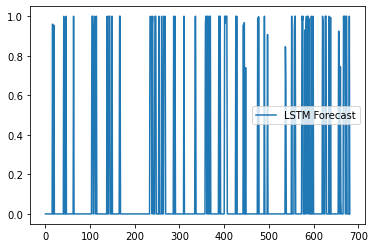

In [96]:
# Model evaluation using AUC-ROC and F1 Score
y_rf_pred = rf_clf.predict(X_test_processed)
y_gb_pred = gb_clf.predict(X_test_processed)

roc_auc_rf = roc_auc_score(y_test, y_rf_pred)
f1_rf = f1_score(y_test, y_rf_pred)

roc_auc_gb = roc_auc_score(y_test, y_gb_pred)
f1_gb = f1_score(y_test, y_gb_pred)

# Print the evaluation metrics
print(f"Random Forest AUC-ROC: {roc_auc_rf}, F1 Score: {f1_rf}")
print(f"Gradient Boosting AUC-ROC: {roc_auc_gb}, F1 Score: {f1_gb}")

# LSTM forecast results can be plotted
plt.plot(model.predict(X_lstm), label='LSTM Forecast')
plt.legend()
plt.show()

In [97]:
# 3. Calculate AUC and F1-Score

# Calculate AUC for ARIMA
arima_auc = roc_auc_score(y_test, arima_predictions)
arima_f1 = f1_score(y_test, arima_predictions)

# Calculate AUC for LSTM
lstm_auc = roc_auc_score(y_test[time_steps:], lstm_predictions_binary)
lstm_f1 = f1_score(y_test[time_steps:], lstm_predictions_binary)

# Print the results
print(f"ARIMA AUC: {arima_auc:.4f}, F1-Score: {arima_f1:.4f}")
print(f"LSTM AUC: {lstm_auc:.4f}, F1-Score: {lstm_f1:.4f}")

NameError: name 'arima_predictions' is not defined